<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/190711_%EB%AA%A8%EB%8B%9D%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers, models

import random as rd

from sklearn.metrics import accuracy_score

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 8770
다음 그림은 숫자 4 입니다.


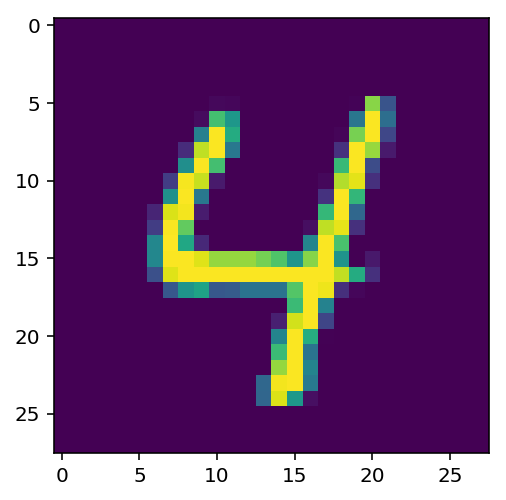

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
plt.imshow(test_x[id])
plt.show()

In [0]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


In [0]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


In [0]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


In [0]:
# One-hot Encoding

train_y = np.eye(10)[train_y]
test_y = np.eye(10)[test_y]

print(test_y[2])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()
model.add( layers.Dense(1024, input_shape=(784,), activation='relu'))
model.add( layers.Dense(1024, activation = 'relu')     )
model.add( layers.Dense(1024, activation = 'relu')     )
model.add( layers.Dense(1024, activation = 'relu')     )
model.add( layers.Dense(512, activation = 'relu')     )
model.add( layers.Dense(10, activation = 'softmax')     )

# 컴파일 해주렴!
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics =['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 4,482,570
Trainable params: 4,482,570
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit(train_x, train_y, epochs=15, batch_size = 2000,
                    validation_split = 0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 25s 529us/step - loss: 0.8430 - acc: 0.7374 - val_loss: 0.2706 - val_acc: 0.9187
Epoch 2/15
48000/48000 [==============================] - 25s 516us/step - loss: 0.1930 - acc: 0.9421 - val_loss: 0.1394 - val_acc: 0.9587
Epoch 3/15
48000/48000 [==============================] - 25s 513us/step - loss: 0.1085 - acc: 0.9669 - val_loss: 0.1000 - val_acc: 0.9707
Epoch 4/15
48000/48000 [==============================] - 25s 512us/step - loss: 0.0654 - acc: 0.9809 - val_loss: 0.1002 - val_acc: 0.9699
Epoch 5/15
48000/48000 [==============================] - 25s 511us/step - loss: 0.0430 - acc: 0.9874 - val_loss: 0.0864 - val_acc: 0.9763
Epoch 6/15
48000/48000 [==============================] - 25s 515us/step - loss: 0.0240 - acc: 0.9933 - val_loss: 0.0856 - val_acc: 0.9765
Epoch 7/15
48000/48000 [==============================] - 25s 513us/step - loss: 0.0149 - acc: 0.9956 - val_loss: 0.

In [0]:
performance_test = model.evaluate(test_x, test_y, batch_size = 100)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

10000/10000 [==============================] - 2s 249us/step
Test Loss : 0.109086,  Test Accuracy : 97.620%


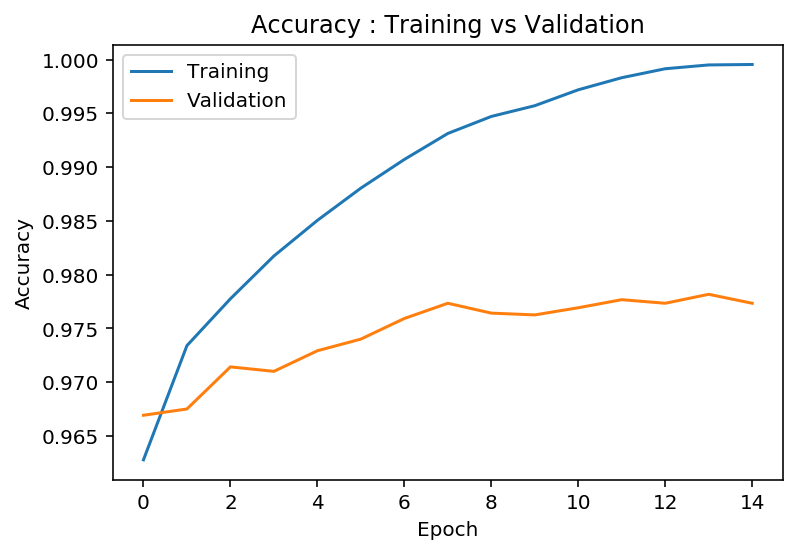

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

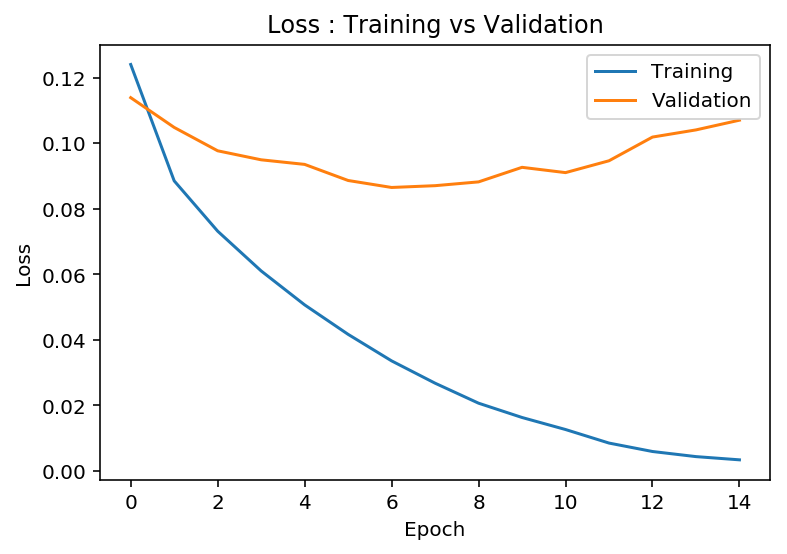

In [0]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()